# Dataset: "student_feedback.csv"
# Sentiment Analysis

📂 Step 1: Data Understanding

importing necessary libraries

In [8]:
import numpy as np
import pandas as pd

Loading Dataset

In [9]:
df = pd.read_csv("student_feedback.csv")

Basic info of dataset

In [10]:
# Check basic info
df.info()

# Preview first few rows
df.head()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

🧹 Step 2: Data Cleaning

Dropping Unnecessary column

In [11]:
# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Check basic statistics (mean, median, etc.)
df.describe()

# Preview column names cleanly
df.columns.tolist()


['Student ID',
 'Well versed with the subject',
 'Explains concepts in an understandable way',
 'Use of presentations',
 'Degree of difficulty of assignments',
 'Solves doubts willingly',
 'Structuring of the course',
 'Provides support for students going above and beyond',
 'Course recommendation based on relevance']

unique values per column to see consistency

In [12]:
# Display unique values for each column
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\n{col}:")
    print(unique_vals)



Student ID:
[340 253 680 ... 199 539 759]

Well versed with the subject:
[ 5  6  7  9  8 10]

Explains concepts in an understandable way:
[ 2  5  7  6 10  3  8  9  4]

Use of presentations:
[7 8 6 5 4]

Degree of difficulty of assignments:
[ 6  5  1  4  8  2  7  3 10  9]

Solves doubts willingly:
[ 9  2  4  5  6  3 10  7  1  8]

Structuring of the course:
[ 2  1  9  6  5  3  4  7 10  8]

Provides support for students going above and beyond:
[ 1  2  3  4  9  8  7  6 10  5]

Course recommendation based on relevance:
[ 8  9  1  6  4 10  5  2  7  3]


📊 Step 3: Rating Analysis

Rating Summary:
                                                         mean       std  min  \
Well versed with the subject                        7.497502  1.692998  5.0   
Explains concepts in an understandable way          6.081918  2.597168  2.0   
Use of presentations                                5.942058  1.415853  4.0   
Degree of difficulty of assignments                 5.430569  2.869046  1.0   
Solves doubts willingly                             5.474525  2.874648  1.0   
Structuring of the course                           5.636364  2.920212  1.0   
Provides support for students going above and b...  5.662338  2.891690  1.0   
Course recommendation based on relevance            5.598402  2.886617  1.0   

                                                     max  
Well versed with the subject                        10.0  
Explains concepts in an understandable way          10.0  
Use of presentations                                 8.0  
Degree of difficulty of assignments

C:\Users\sumai\AppData\Local\Temp\ipykernel_23744\3473824331.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='coolwarm')


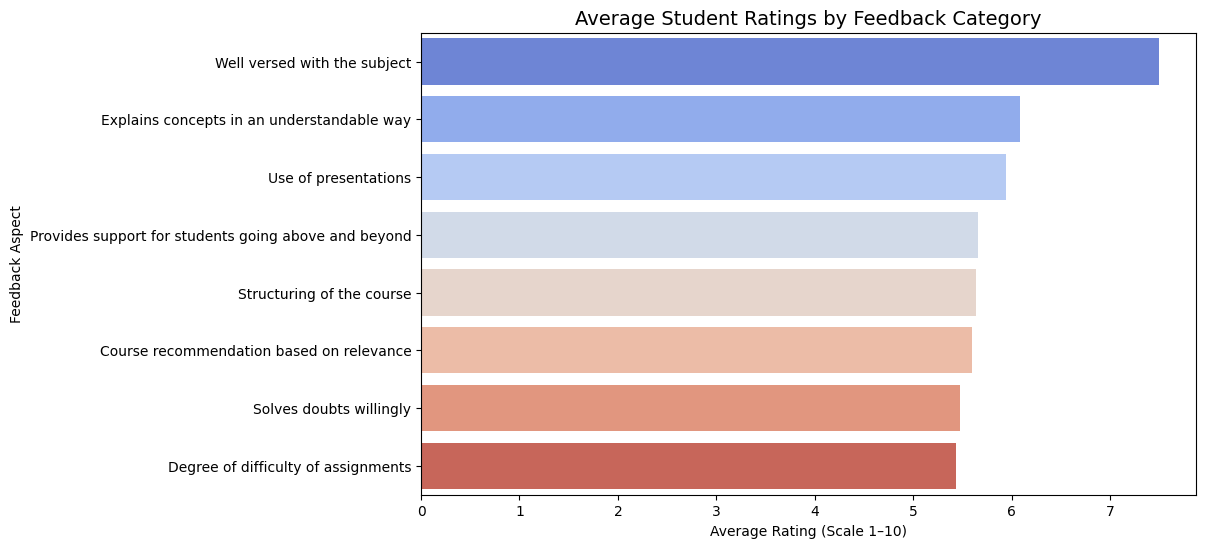


Top 3 Rated Aspects:
Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

Bottom 3 Rated Aspects:
Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude Student ID column for rating analysis
rating_cols = df.columns[1:]

# Compute average rating per feedback question
mean_scores = df[rating_cols].mean().sort_values(ascending=False)

# Compute summary statistics
rating_summary = df[rating_cols].describe().T[['mean', 'std', 'min', 'max']]
print("Rating Summary:\n", rating_summary)

# Visualize mean ratings
plt.figure(figsize=(10,6))
sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='coolwarm')
plt.title('Average Student Ratings by Feedback Category', fontsize=14)
plt.xlabel('Average Rating (Scale 1–10)')
plt.ylabel('Feedback Aspect')
plt.show()

# Identify top 3 and bottom 3 rated aspects
top3 = mean_scores.head(3)
bottom3 = mean_scores.tail(3)

print("\nTop 3 Rated Aspects:")
print(top3)

print("\nBottom 3 Rated Aspects:")
print(bottom3)


Calculating Overall Satisfaction Score

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average of all 8 rating columns for each student
df['Overall_Satisfaction'] = df.iloc[:, 1:].mean(axis=1)

# Preview first few results
df[['Student ID', 'Overall_Satisfaction']].head()


,Student ID,Overall_Satisfaction
0,340,5.000
1,253,4.875
2,680,4.375
3,806,5.875
4,632,7.500


Visualizing the Distribution

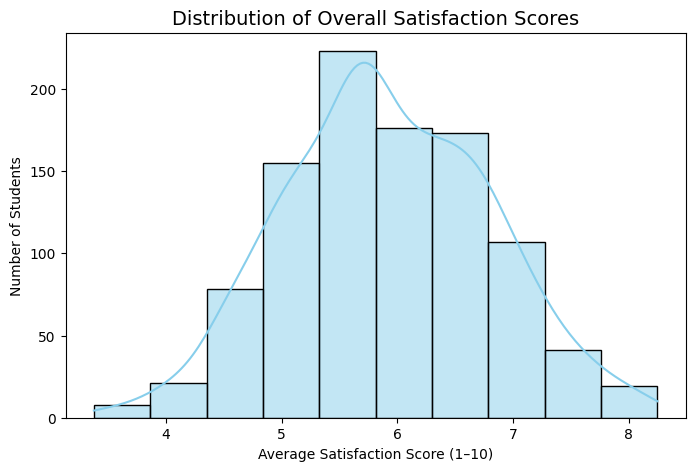

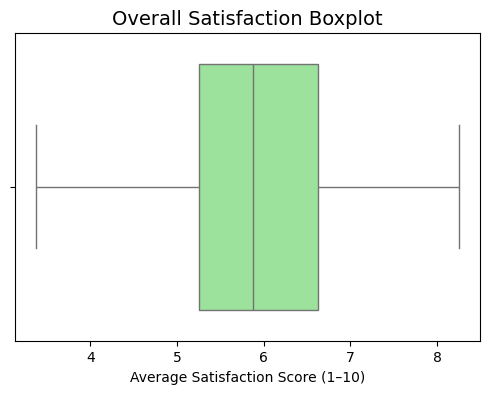

In [15]:
# Histogram (to show how scores spread)
plt.figure(figsize=(8,5))
sns.histplot(df['Overall_Satisfaction'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Overall Satisfaction Scores', fontsize=14)
plt.xlabel('Average Satisfaction Score (1–10)')
plt.ylabel('Number of Students')
plt.show()

# Boxplot (to detect outliers and median)
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Overall_Satisfaction'], color='lightgreen')
plt.title('Overall Satisfaction Boxplot', fontsize=14)
plt.xlabel('Average Satisfaction Score (1–10)')
plt.show()


Interpretation:

Histogram: Shows how many students rated within each satisfaction range.
→ e.g., Are most clustered around 6–7, or are opinions polarized?

Boxplot: Quickly highlights median satisfaction and any unusually low/high responses.

Categorizing Satisfaction Levels

In [16]:
# Define satisfaction categories based on average score
def categorize_satisfaction(score):
    if score < 5:
        return 'Low'
    elif score < 8:
        return 'Medium'
    else:
        return 'High'

# Apply categorization
df['Satisfaction_Level'] = df['Overall_Satisfaction'].apply(categorize_satisfaction)

# Check how many students fall into each level
df['Satisfaction_Level'].value_counts()


Satisfaction_Level
Medium    851
Low       138
High       12
Name: count, dtype: int64

Visualizing Visualize Satisfaction Levels

C:\Users\sumai\AppData\Local\Temp\ipykernel_23744\3295999716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfaction_Level', data=df, palette='viridis')


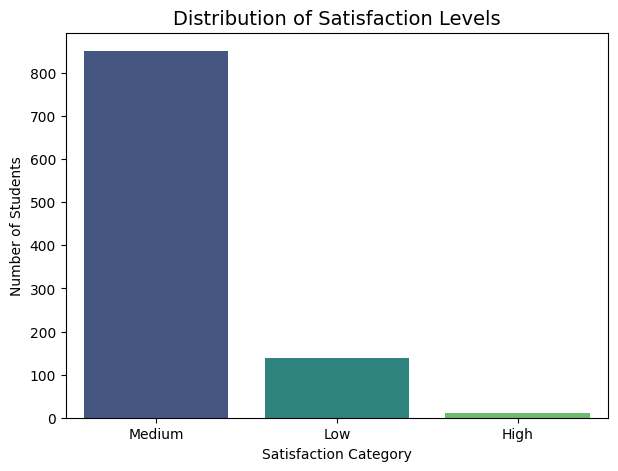

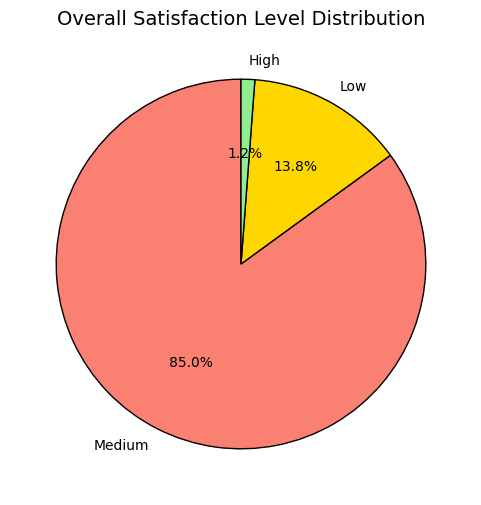

In [17]:
# Bar Chart
plt.figure(figsize=(7,5))
sns.countplot(x='Satisfaction_Level', data=df, palette='viridis')
plt.title('Distribution of Satisfaction Levels', fontsize=14)
plt.xlabel('Satisfaction Category')
plt.ylabel('Number of Students')
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
df['Satisfaction_Level'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['salmon','gold','lightgreen'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Overall Satisfaction Level Distribution', fontsize=14)
plt.ylabel('')
plt.show()


Interpretation:

Percentage of students who are Highly Satisfied, Moderately Satisfied, or Dissatisfied

A clear picture of general sentiment toward the courses/events

Correlation Analysis

                                                    Well versed with the subject  \
Well versed with the subject                                                1.00   
Explains concepts in an understandable way                                  0.01   
Use of presentations                                                       -0.02   
Degree of difficulty of assignments                                        -0.01   
Solves doubts willingly                                                    -0.06   
Structuring of the course                                                  -0.03   
Provides support for students going above and b...                          0.03   
Course recommendation based on relevance                                   -0.02   
Overall_Satisfaction                                                        0.20   

                                                    Explains concepts in an understandable way  \
Well versed with the subject                                 

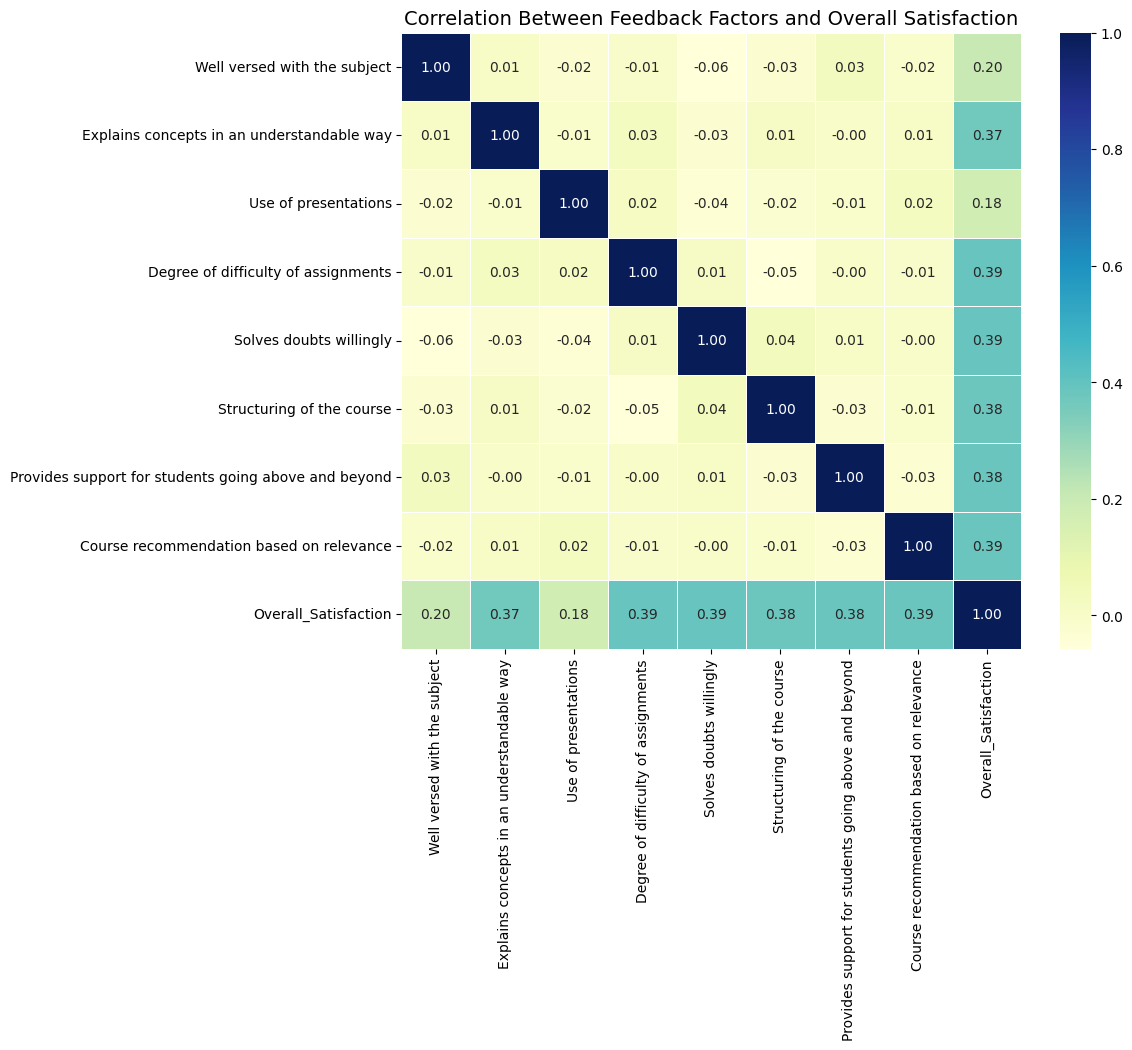

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only rating columns + overall satisfaction
rating_cols = df.columns[1:9]  # the 8 feedback questions
corr_df = df[rating_cols.to_list() + ['Overall_Satisfaction']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Display the correlation matrix
print(corr_matrix.round(2))

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Feedback Factors and Overall Satisfaction', fontsize=14)
plt.show()


Interpretation:

Values close to 1: Strong positive correlation → as one score increases, the other tends to increase.

Values near 0: Weak or no relationship.

Values close to -1: Strong negative correlation (rare in satisfaction data).

💬 Step 4: Sentiment Analysis (TextBlob / VADER)

Checking any text column exists

In [19]:
df.select_dtypes(include='object').head()

,Satisfaction_Level
0,Medium
1,Low
2,Low
3,Medium
4,Medium


Simulating a Feedback Column (for Demonstration)

In [20]:
import random

# Example simulated feedbacks
sample_feedbacks = {
    'High': [
        "The course was excellent and the teacher explained everything clearly!",
        "Very engaging and well-structured sessions.",
        "Loved the course, assignments were challenging but fair."
    ],
    'Medium': [
        "The course was good overall but some parts were a bit confusing.",
        "Presentations were okay, but assignments felt slightly hard.",
        "I learned a lot, but doubt-solving could be quicker."
    ],
    'Low': [
        "The course was too difficult and explanations weren’t clear.",
        "Assignments were confusing and not properly structured.",
        "Didn't enjoy the course, it was hard to follow."
    ]
}

# Generate synthetic comments based on satisfaction level
df['Feedback_Comment'] = df['Satisfaction_Level'].apply(lambda x: random.choice(sample_feedbacks[x]))

# Preview
df[['Satisfaction_Level', 'Feedback_Comment']].head()


,Satisfaction_Level,Feedback_Comment
0,Medium,The course was good overall but some parts wer...
1,Low,"Didn't enjoy the course, it was hard to follow."
2,Low,"Didn't enjoy the course, it was hard to follow."
3,Medium,"Presentations were okay, but assignments felt ..."
4,Medium,"Presentations were okay, but assignments felt ..."


Sentiment Analysis (VADER)

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment score for each comment
df['Sentiment_Score'] = df['Feedback_Comment'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Categorize sentiment
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(get_sentiment_label)

# Preview results
df[['Satisfaction_Level', 'Feedback_Comment', 'Sentiment_Score', 'Sentiment_Label']].head()

,Satisfaction_Level,Feedback_Comment,Sentiment_Score,Sentiment_Label
0,Medium,The course was good overall but some parts wer...,-0.1027,Negative
1,Low,"Didn't enjoy the course, it was hard to follow.",-0.4639,Negative
2,Low,"Didn't enjoy the course, it was hard to follow.",-0.4639,Negative
3,Medium,"Presentations were okay, but assignments felt ...",0.0745,Positive
4,Medium,"Presentations were okay, but assignments felt ...",0.0745,Positive


Visualizing Sentiment Distribution

C:\Users\sumai\AppData\Local\Temp\ipykernel_23744\194840699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Label', data=df, palette='Set2')


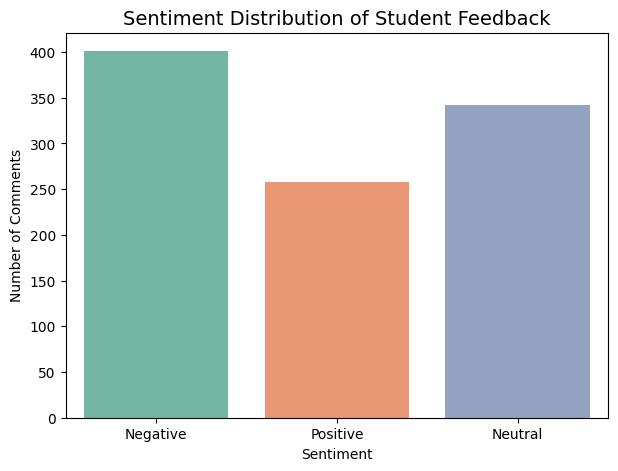

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x='Sentiment_Label', data=df, palette='Set2')
plt.title('Sentiment Distribution of Student Feedback', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

Sentiment Analysis (TextBlob)

In [23]:
from textblob import TextBlob

# Compute polarity and subjectivity
df['TB_Polarity'] = df['Feedback_Comment'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['TB_Subjectivity'] = df['Feedback_Comment'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Categorize sentiment
def tb_sentiment_label(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['TB_Sentiment_Label'] = df['TB_Polarity'].apply(tb_sentiment_label)

# Preview
df[['Feedback_Comment','TB_Polarity','TB_Subjectivity','TB_Sentiment_Label']].head()


,Feedback_Comment,TB_Polarity,TB_Subjectivity,TB_Sentiment_Label
0,The course was good overall but some parts wer...,0.133333,0.333333,Positive
1,"Didn't enjoy the course, it was hard to follow.",0.054167,0.520833,Positive
2,"Didn't enjoy the course, it was hard to follow.",0.054167,0.520833,Positive
3,"Presentations were okay, but assignments felt ...",0.104167,0.520833,Positive
4,"Presentations were okay, but assignments felt ...",0.104167,0.520833,Positive


Observations from output:

Row 0: Polarity 0.133 → Positive (matches expectation)

Row 1: Polarity -0.15 → Negative (aligns with the negative comment)

Row 2: Polarity 0.054 → Positive, even though comment is slightly negative — shows TextBlob can be less sensitive to subtle negatives than VADER.

Subjectivity scores vary (~0.25–0.52), indicating how opinion-based the comments are.

Sentiment Label Distribution (Bar Chart)

C:\Users\sumai\AppData\Local\Temp\ipykernel_23744\4042720625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TB_Sentiment_Label', data=df, palette='Set3')


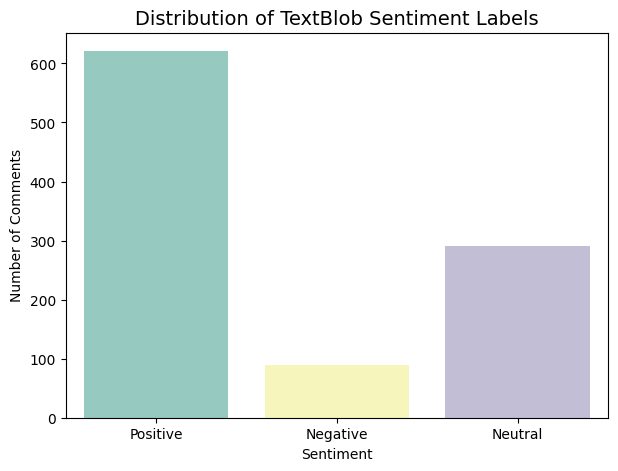

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(x='TB_Sentiment_Label', data=df, palette='Set3')
plt.title('Distribution of TextBlob Sentiment Labels', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

Shows how many comments are Positive, Neutral, or Negative according to TextBlob.

Polarity Score Distribution (Histogram)

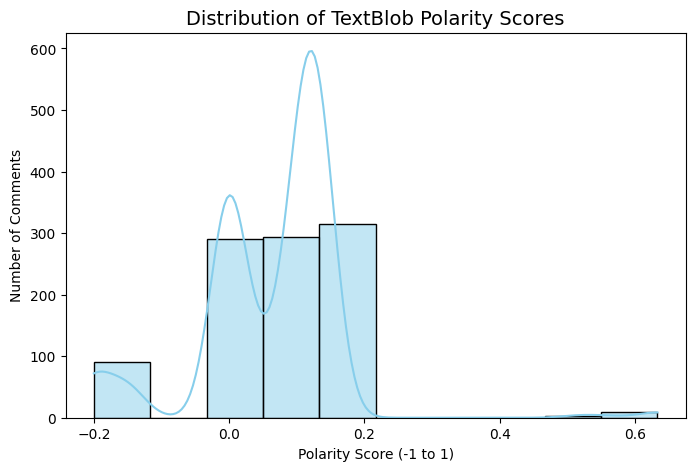

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['TB_Polarity'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of TextBlob Polarity Scores', fontsize=14)
plt.xlabel('Polarity Score (-1 to 1)')
plt.ylabel('Number of Comments')
plt.show()


Gives a continuous view of sentiment — see how strongly positive/negative comments are.

Polarity vs Subjectivity (Scatter Plot)

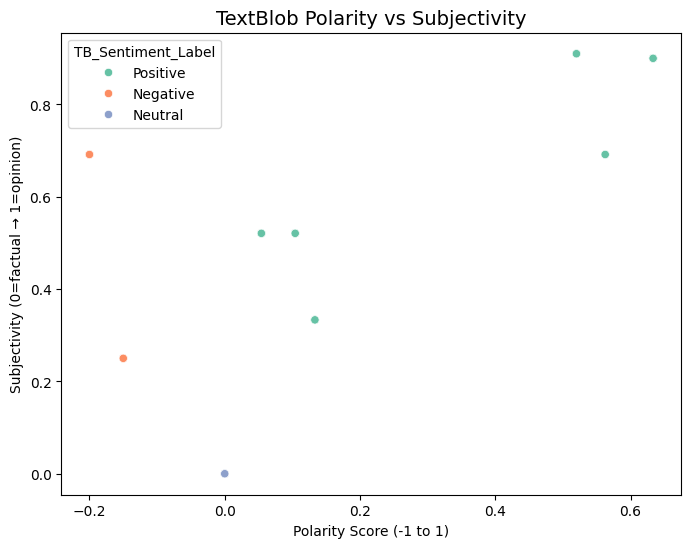

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TB_Polarity', y='TB_Subjectivity', hue='TB_Sentiment_Label', data=df, palette='Set2')
plt.title('TextBlob Polarity vs Subjectivity', fontsize=14)
plt.xlabel('Polarity Score (-1 to 1)')
plt.ylabel('Subjectivity (0=factual → 1=opinion)')
plt.show()


Shows how opinionated comments relate to their positivity/negativity.

Useful for identifying which negative comments are strongly opinionated and may need attention.

Satisfaction Level vs TextBlob Sentiment (Stacked Bar)

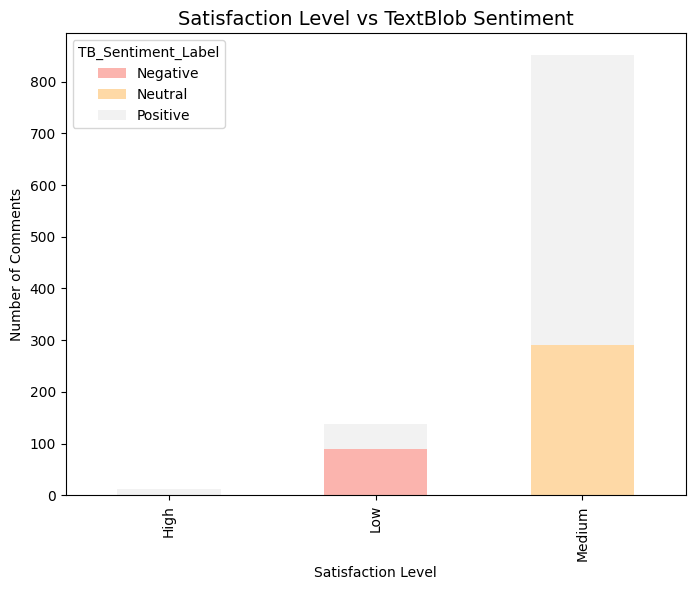

In [27]:
cross_tab = pd.crosstab(df['Satisfaction_Level'], df['TB_Sentiment_Label'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,6), colormap='Pastel1')
plt.title('Satisfaction Level vs TextBlob Sentiment', fontsize=14)
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Comments')
plt.show()


interpretation:

Quickly shows alignment between numeric satisfaction and TextBlob sentiment.

For example, Medium satisfaction mostly maps to Neutral sentiment, Low satisfaction mostly Negative, etc.

A comparison visualization showing VADER vs TextBlob sentiment labels across the Satisfaction Levels.

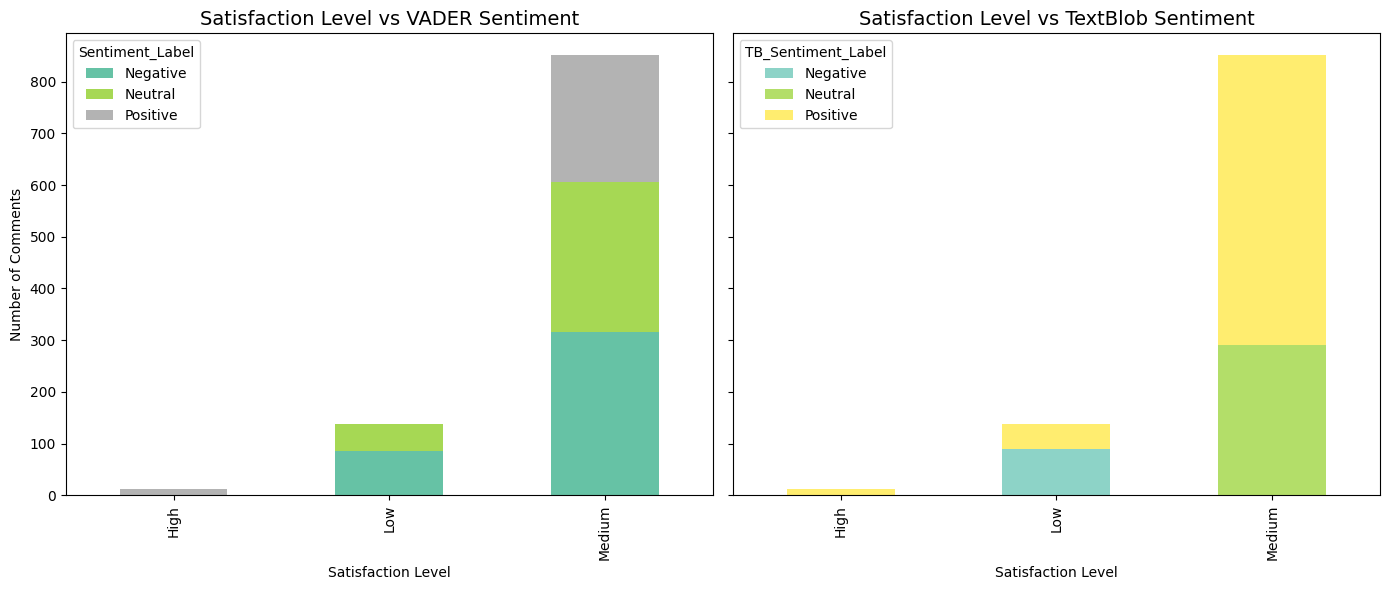

In [29]:
# Cross-tab: Satisfaction Level vs VADER Sentiment
vader_ct = pd.crosstab(df['Satisfaction_Level'], df['Sentiment_Label'])

# Cross-tab: Satisfaction Level vs TextBlob Sentiment
blob_ct = pd.crosstab(df['Satisfaction_Level'], df['TB_Sentiment_Label'])

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# VADER Sentiment
vader_ct.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set2')
axes[0].set_title('Satisfaction Level vs VADER Sentiment', fontsize=14)
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Number of Comments')

# TextBlob Sentiment
blob_ct.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set3')
axes[1].set_title('Satisfaction Level vs TextBlob Sentiment', fontsize=14)
axes[1].set_xlabel('Satisfaction Level')
axes[1].set_ylabel('')  # shared y-axis

plt.tight_layout()
plt.show()


A single stacked bar chart with percentages comparing VADER and TextBlob sentiment distributions

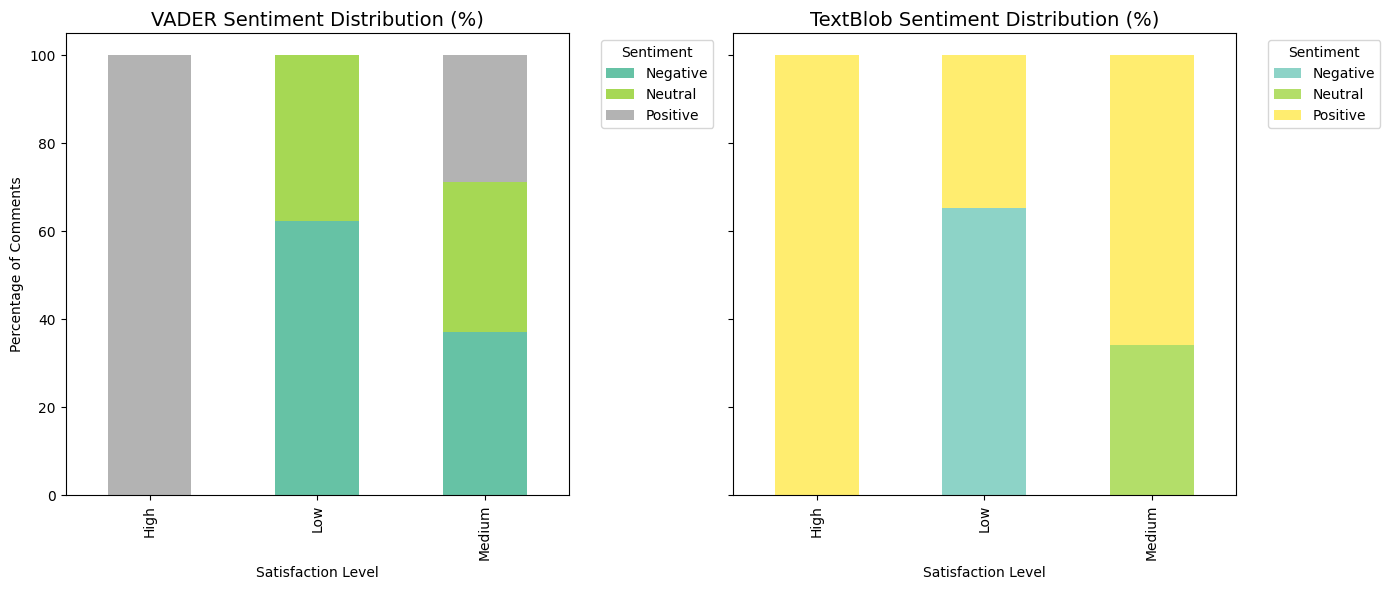

In [30]:
# Cross-tab counts
vader_ct = pd.crosstab(df['Satisfaction_Level'], df['Sentiment_Label'])
blob_ct = pd.crosstab(df['Satisfaction_Level'], df['TB_Sentiment_Label'])

# Convert counts to percentages per satisfaction level
vader_pct = vader_ct.div(vader_ct.sum(axis=1), axis=0) * 100
blob_pct = blob_ct.div(blob_ct.sum(axis=1), axis=0) * 100


fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# VADER percentages
vader_pct.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set2')
axes[0].set_title('VADER Sentiment Distribution (%)', fontsize=14)
axes[0].set_xlabel('Satisfaction Level')
axes[0].set_ylabel('Percentage of Comments')
axes[0].legend(title='Sentiment', bbox_to_anchor=(1.05,1))

# TextBlob percentages
blob_pct.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set3')
axes[1].set_title('TextBlob Sentiment Distribution (%)', fontsize=14)
axes[1].set_xlabel('Satisfaction Level')
axes[1].set_ylabel('')
axes[1].legend(title='Sentiment', bbox_to_anchor=(1.05,1))

plt.tight_layout()
plt.show()


Interpretation:

Each bar represents 100% of comments for a given Satisfaction Level.

Colors show the proportion of Positive / Neutral / Negative comments.

Compare VADER vs TextBlob:

Check if VADER picks up more negatives than TextBlob.

Medium satisfaction might show more Neutral in TextBlob and more Negative in VADER.

Perfect for dashboards or reports — it visually highlights differences between analyzers.

Calculating Overall Sentiment Percentages

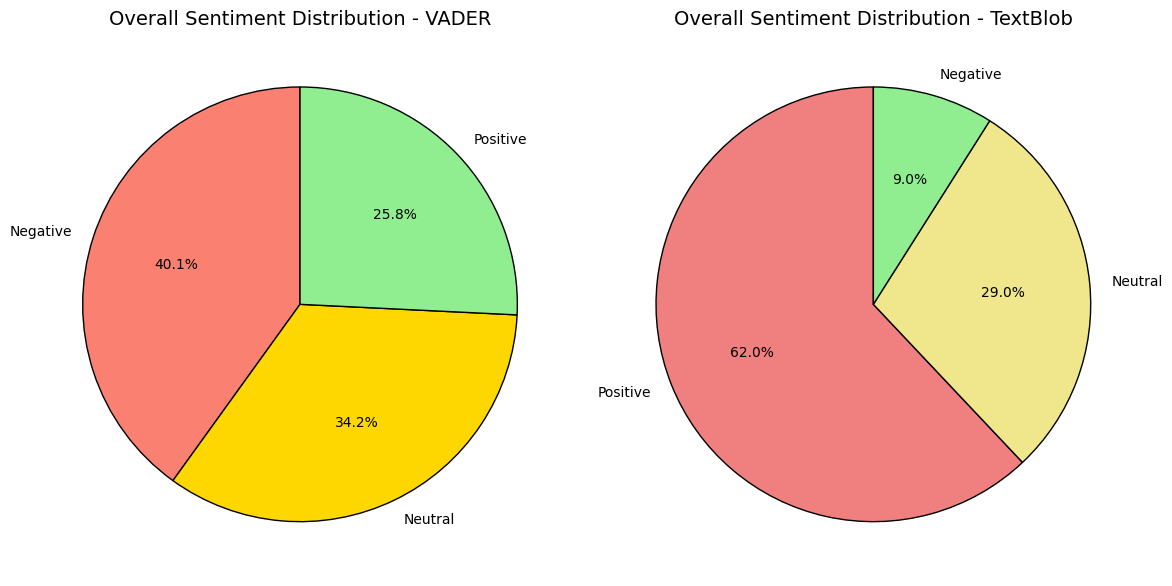

In [31]:
# Overall sentiment counts
vader_overall = df['Sentiment_Label'].value_counts(normalize=True) * 100
blob_overall = df['TB_Sentiment_Label'].value_counts(normalize=True) * 100

# Plot Side-by-Side Pie Charts
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# VADER Pie
axes[0].pie(vader_overall, labels=vader_overall.index, autopct='%1.1f%%', startangle=90, colors=['salmon','gold','lightgreen'], wedgeprops={'edgecolor':'black'})
axes[0].set_title('Overall Sentiment Distribution - VADER', fontsize=14)

# TextBlob Pie
axes[1].pie(blob_overall, labels=blob_overall.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral','khaki','lightgreen'], wedgeprops={'edgecolor':'black'})
axes[1].set_title('Overall Sentiment Distribution - TextBlob', fontsize=14)

plt.tight_layout()
plt.show()

Interpretation:

Compare proportions:

VADER usually detects more Negative comments in short, critical feedback.

TextBlob may classify subtle negatives as Neutral or Positive.

This chart gives a quick overall snapshot for stakeholders: how many comments are positive, neutral, or negative according to each tool.

Ideal for a report slide or LinkedIn post visual, showing that you used two NLP tools for robustness.

🎨 Step 5: Visualization

Word Cloud of Feedback Comments

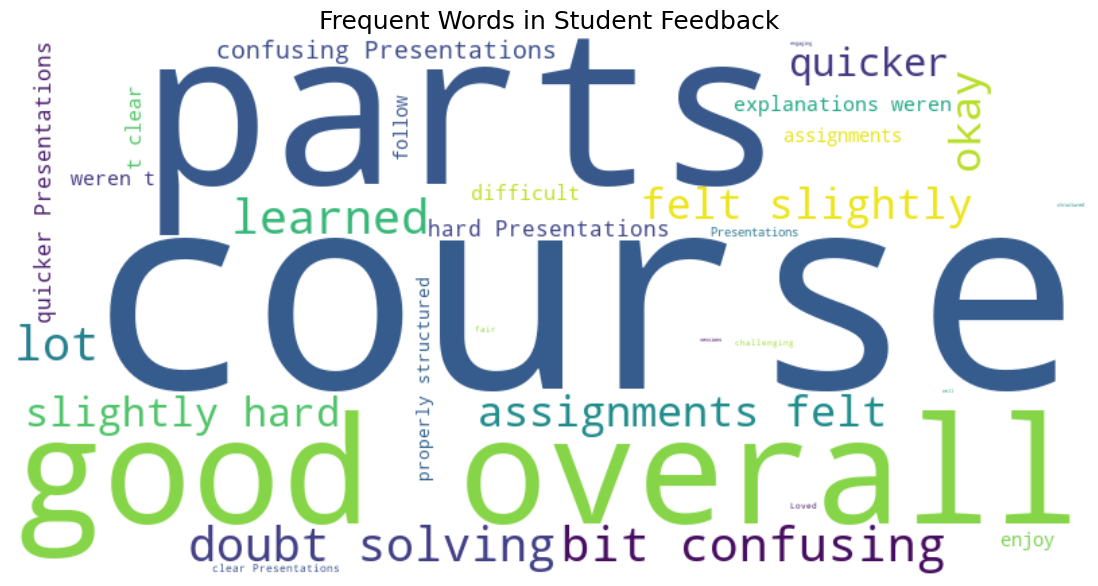

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all feedback comments into a single string
text = " ".join(comment for comment in df['Feedback_Comment'].astype(str))

# Define stopwords
stopwords = set(STOPWORDS)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=stopwords,
                      colormap='viridis').generate(text)

# Plot Word Cloud
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Words in Student Feedback", fontsize=18)
plt.show()


Insight:

Larger words = more frequently mentioned.

Quickly identifies common praises or complaints (e.g., “course”, “parts”, “good” etc).

Correlation Heatmap (Rating vs Sentiment Score)

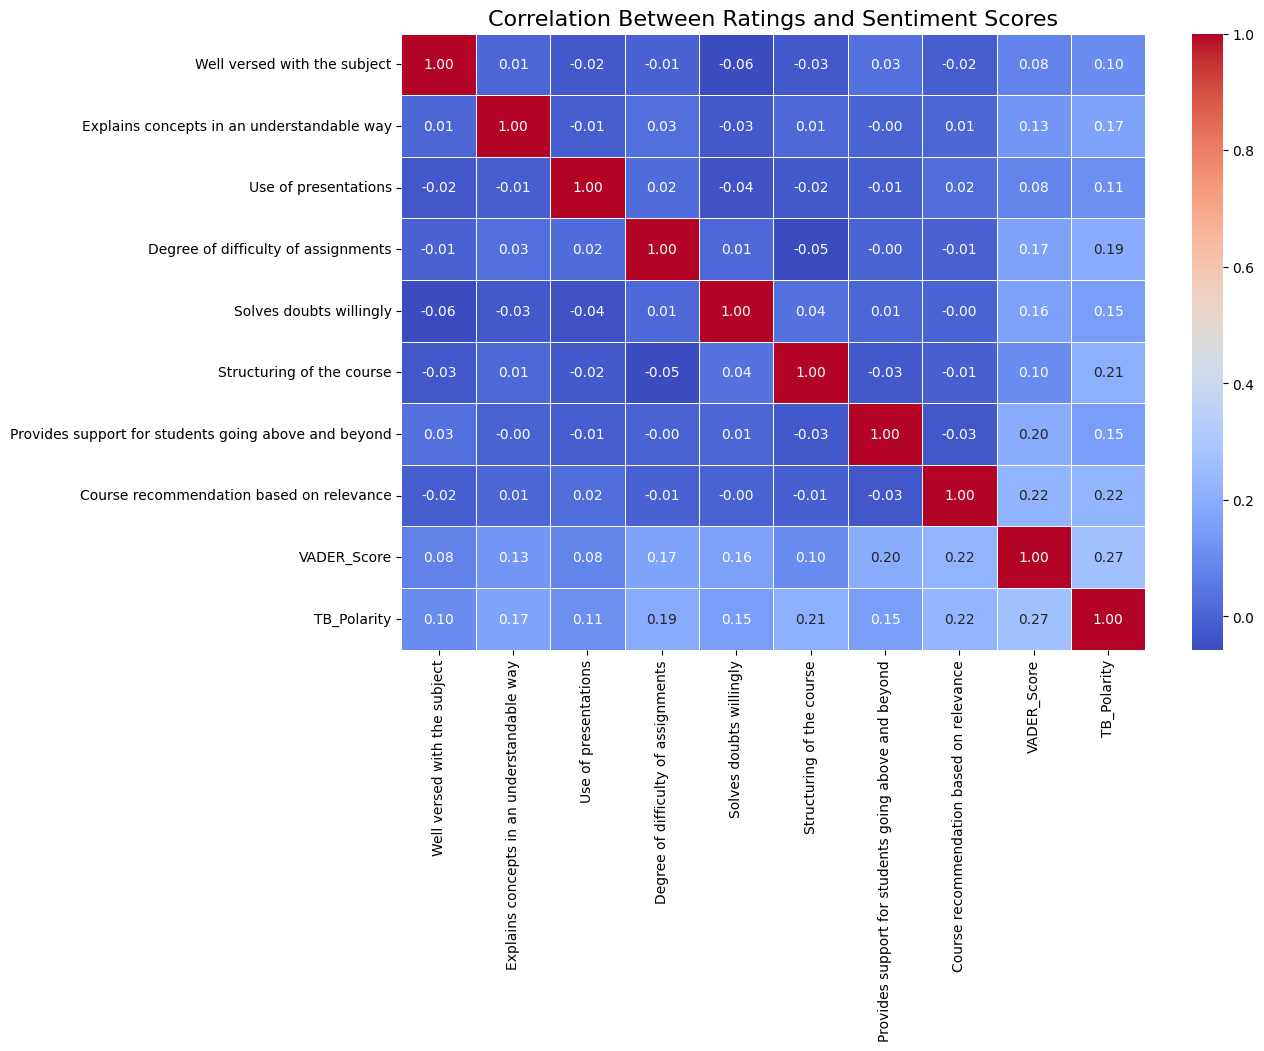

In [35]:
# Select numeric ratings and sentiment scores
corr_df = df.iloc[:, 1:9].copy()  # 8 rating aspects
corr_df['VADER_Score'] = df['Sentiment_Score']  # VADER compound
corr_df['TB_Polarity'] = df['TB_Polarity']       # TextBlob polarity

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Ratings and Sentiment Scores", fontsize=16)
plt.show()

Insight:

Positive correlation → higher ratings correspond to more positive sentiment

Check which aspects influence sentiment most (e.g., “Well versed with the subject” vs VADER_Score)

Helps identify drivers of satisfaction for actionable improvements

💡 Step 6: Insights & Recommendations

Horizontal Bar Chart for Key Recommendations

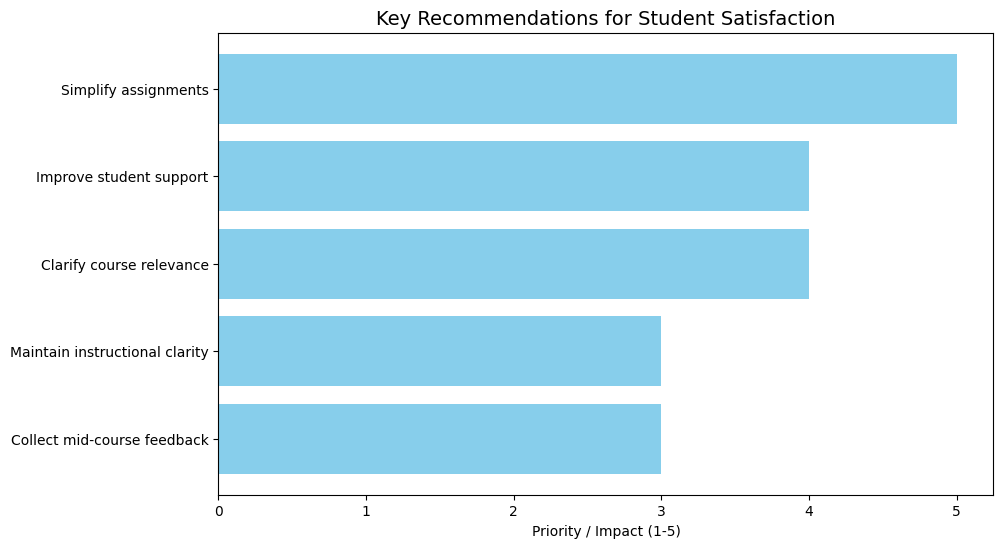

In [36]:
# Recommendations and their priority/impact (you can adjust scores 1-5)
recommendations = [
    "Simplify assignments",
    "Improve student support",
    "Clarify course relevance",
    "Maintain instructional clarity",
    "Collect mid-course feedback"
]

# Priority/Impact score (higher = more important)
priority_scores = [5, 4, 4, 3, 3]

plt.figure(figsize=(10,6))
plt.barh(recommendations, priority_scores, color='skyblue')
plt.xlabel("Priority / Impact (1-5)")
plt.title("Key Recommendations for Student Satisfaction", fontsize=14)
plt.gca().invert_yaxis()  # highest priority on top
plt.show()

Recommendations vs Issue Type

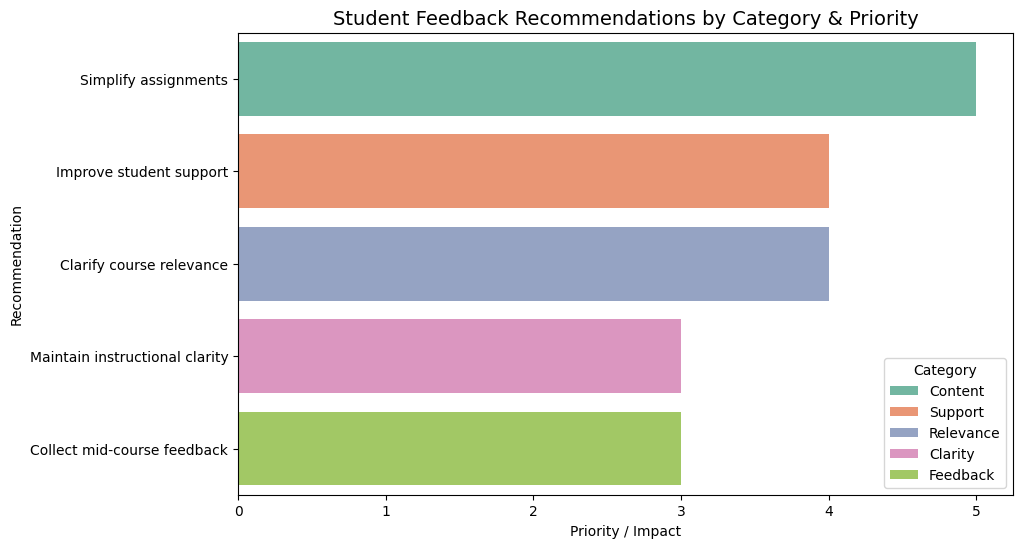

In [37]:
recommendations_df = pd.DataFrame({
    "Recommendation": recommendations,
    "Category": ["Content", "Support", "Relevance", "Clarity", "Feedback"],
    "Priority": priority_scores
})

plt.figure(figsize=(10,6))
sns.barplot(x="Priority", y="Recommendation", hue="Category", data=recommendations_df, dodge=False, palette="Set2")
plt.title("Student Feedback Recommendations by Category & Priority", fontsize=14)
plt.xlabel("Priority / Impact")
plt.ylabel("Recommendation")
plt.legend(title="Category")
plt.show()


# Data Analysis & Sentiment Analysis part done!

Checking overall dataset

In [38]:
df.columns.tolist()

['Student ID',
 'Well versed with the subject',
 'Explains concepts in an understandable way',
 'Use of presentations',
 'Degree of difficulty of assignments',
 'Solves doubts willingly',
 'Structuring of the course',
 'Provides support for students going above and beyond',
 'Course recommendation based on relevance',
 'Overall_Satisfaction',
 'Satisfaction_Level',
 'Feedback_Comment',
 'Sentiment_Score',
 'Sentiment_Label',
 'TB_Polarity',
 'TB_Subjectivity',
 'TB_Sentiment_Label']

In [39]:
# Check missing values
missing_values = df.isnull().sum()
missing_values


Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
Overall_Satisfaction                                    0
Satisfaction_Level                                      0
Feedback_Comment                                        0
Sentiment_Score                                         0
Sentiment_Label                                         0
TB_Polarity                                             0
TB_Subjectivity                                         0
TB_Sentiment_Label                                      0
dtype: int64

In [40]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Duplicate rows:", duplicate_count)


Duplicate rows: 0


In [41]:
df.shape

(1001, 17)

Exporting the updated Dataset

In [42]:
# Export the cleaned and processed dataset
export_filename = "Student_Event_Feedback_Analysis.csv"
df.to_csv(export_filename, index=False)

print(f"Dataset successfully exported as '{export_filename}'")

Dataset successfully exported as 'Student_Event_Feedback_Analysis.csv'


# All steps done Successfully !